# Product Analysis with KMeans Clustering
---
## Overview
- Preprocess the data using a column transformer for one-hot encoding categorical columns and scaling numeric columns
- Search for the optimal number of clusters by utilizing the silhouette score as a metric
- Build the final K-means model based on the number of clusters that yielded the highest silhouette score
- Perform exploratory data analysis on the resulting clusters


### Imports

In [104]:
# Imports needed for clustering
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### Load Subset of Cleaned Data

In [105]:
# Load in only subset of data, sample size: 50,000
df = pd.read_csv('../data/Clean-ALL_reviews.csv', lineterminator='\n', low_memory=False ).sample(n=50000)
df.head()

author_id  rating  is_recommended  total_feedback_count  \
512595   1190204063       4               1                     0   
429898   8333429537       2               0                     7   
2389    30737469615       1               0                     8   
455985  32683172517       3               1                    32   
747809  21229080927       5               1                     0   

        total_neg_feedback_count  total_pos_feedback_count submission_time  \
512595                         0                         0      2021-07-15   
429898                         2                         5      2021-04-04   
2389                           6                         2      2021-09-03   
455985                         3                        29      2022-01-24   
747809                         0                         0      2023-02-28   

                                              review_text  \
512595  I love how this product feels and smells. A li...   
429898  Although it feels really really good going on ...   
2389    Made my lips very dry and crusty after one use...   
455985  Algin on ingredient list definition is- It is ...   
747809  I’m loving this new launch by benefit cosmetic...   

                                  review_title    skin_tone  ...  \
512595                        Supple and fresh  lightMedium  ...   
429898        Too Much of a Good Thing is Bad.  lightMedium  ...   
2389                                   missing        light  ...   
455985                                  Maybe?        light  ...   
747809  Cute packaging and amazing moisturizer        light  ...   

                                             product_name         brand_name  \
512595                  Dewtopia 20% Acid Night Treatment       OLEHENRIKSEN   
429898           Water Drench Hyaluronic Acid Moisturizer  Peter Thomas Roth   
2389    Lip Sleeping Mask Intense Hydration with Vitam...            LANEIGE   
455985                    Mini FIRMx Exfoliating Peel Gel  Peter Thomas Roth   
747809  The POREfessional Smooth Sip Lightweight Gel-C...  Benefit Cosmetics   

       price_usd loves_count reviews_count            size  variation_type  \
512595        60       39989          1466     1 oz/ 30 mL            Size   
429898        54       73776          1830   1.7 oz/ 50 mL            Size   
2389          24     1081315         16118    0.7 oz/ 20 g           Color   
455985        16       18585          1686     1 oz/ 30 mL            Size   
747809        44         736           718  1.7 oz / 50 ml            Size   

        variation_value                                        ingredients  \
512595      1 oz/ 30 mL  ['Aqua/Water/Eau, Aloe Barbadensis Leaf Juice,...   
429898    1.7 oz/ 50 mL  ['Water/Aqua/Eau, Glycerin, Cyclopentasiloxane...   
2389           Original  ['Diisostearyl Malate, Hydrogenated Polyisobut...   
455985      1 oz/ 30 mL  ['Water/Aqua/Eau, Peg-32, Cellulose, Butylene ...   
747809   1.7 oz / 50 ml  ['Aqua (Water), Propanediol, Glycerin, Niacina...   

                      category  
512595              Treatments  
429898            Moisturizers  
2389    Lip Balms & Treatments  
455985               Mini Size  
747809            Moisturizers  

[5 rows x 24 columns]

### Preprocessing

In [106]:
# Define the categorical and numeric feature columns to use for Kmeans
cat_cols = ['product_name', 'brand_name', 'skin_type','hair_color','skin_tone', 'variation_value','size','category']
num_cols = ['price_usd', 'rating','is_recommended','loves_count']


# Preprocess the data using one-hot encoding and standard scaling with Column Transformer
preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])

# Apply the preprocessing and obtain the transformed features
X = preprocessor.fit_transform(df)

## Modeling

### KMeans

#### Searching for Optimal # of Clusters for KMeans

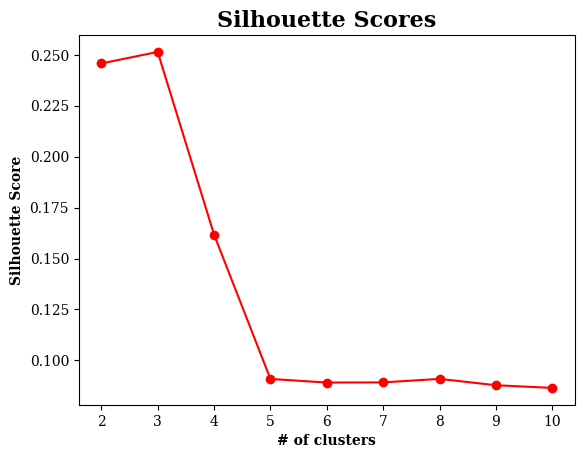

In [113]:
# Create loop that measures silhouette scores to find optimal number of clusters
# Code adapted from lesson 7.01 kmeans, https://git.generalassemb.ly/dsir-0320/7.01-lesson-kmeans
silhouette_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_list.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_list, marker = 'o', color='red' )
plt.xlabel('# of clusters', fontweight = 'semibold')
plt.ylabel('Silhouette Score', fontweight = 'semibold')
plt.title('Silhouette Scores', size= 16, fontweight = 'bold')
#plt.savefig('Silhouette Scores Plot'); already saved
plt.rcParams['font.family'] = 'serif';

- According to the Silhouette Score graph shown above, the optimal value for number of clusters is 3 since it achieved the highest silhouette score. 

#### Final KMeans Model

In [122]:
# Instantiate and fit Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the df
df['cluster'] = cluster_labels

### EDA

In [123]:
# Check out clusters
df.groupby('cluster').mean()

author_id    rating  is_recommended  total_feedback_count  \
cluster                                                                 
0        1.121730e+10  4.419791        0.862938              7.121082   
1        8.147283e+09  2.073378        0.002446              8.016478   
2        9.364184e+09  4.725994        1.000000              3.246300   

         total_neg_feedback_count  total_pos_feedback_count  price_usd  \
cluster                                                                  
0                        1.182545                  5.938537  17.402581   
1                        2.585608                  5.430870  48.509011   
2                        0.494496                  2.751804  50.195912   

           loves_count  reviews_count  
cluster                                
0        843567.996927    9748.089736  
1         91141.074150    1862.883883  
2         81076.993818    1907.259796

*Description of Skincare Product Clusters (KMeans):*

**Cluster 0**: The products in this cluster have an average rating of 4.4 out of 5, and there is an 88% likelihood that these products will be recommended. The average price for these products is approximately $17.00. Products in this cluster have the most reviews per product which could indicate that these products have been at Sephora longer and are the most popular based on their loves_counts.

**Cluster 1**: Products in this cluster have a lower overall rating, averaging 2.03 out of 5. There is a 0% chance of these products being recommended. The average price for these products is around $48.00. These products have the lowest review counts, which could be attributed to their low ratings. It is likely that fewer people are purchasing these products, resulting in fewer reviews being submitted.

**Cluster 2**: This cluster consists of products with the highest overall rating of 4.7 out of 5, and they are 100% likely to be recommended. These products are similar to those in Cluster 0, but the main difference is that they are higher-priced with a average price of $50.00. The low review count could mean that these products arent as frequently most as the more afforable options.


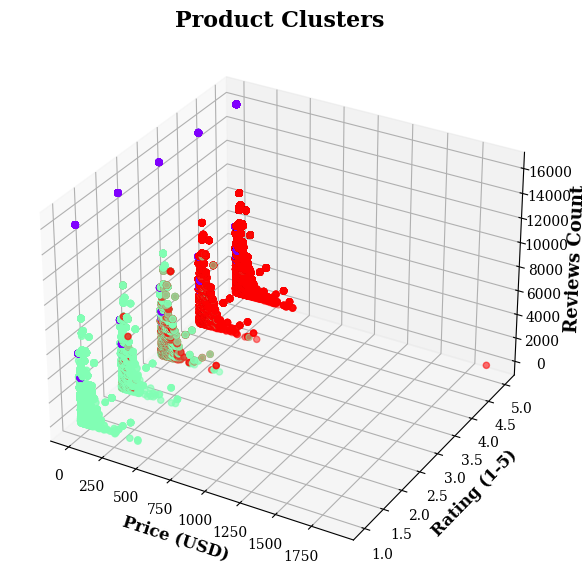

In [157]:
# Create a 3D scatter plot to visualize the relationship between the 'loves count', 'rating', and 'price' variables based clusters
# Code documention from https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.scatter.html#mpl_toolkits.mplot3d.axes3d.Axes3D.scatter
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

ax.scatter3D(df['price_usd'], df['rating'], df['reviews_count'], c = df['cluster'], cmap= 'rainbow')
ax.set_xlabel("Price (USD)", size =12, fontweight='semibold')
ax.set_ylabel("Rating (1-5)", size = 12, fontweight = 'semibold')
ax.set_zlabel("Reviews Count", size=13, fontweight ='semibold')
plt.title("Product Clusters", size=16, fontweight='bold');
# plt.savefig('3D Product Clusters');already saved

3D Scatterplot Interpretation:

       Cluster 0 = purple
       Cluster 1 = light green 
       Cluster 2= red
- The red and green clusters consist of products with similar prices within a certain range. The main difference between the red and green clusters is that the red cluster contains highly rated products, while the green cluster does not.
- The purple cluster stands out with a significantly larger number of review counts compared to the other two clusters. It includes products with a variety of ratings, both high and low. Additionally, the purple cluster tends to have lower price ranges.

In [161]:
# Look into the top ten brands in each cluster 
top10_brands = df.groupby('cluster')['brand_name'].value_counts().groupby('cluster').head(10)

for cluster, brands in top10_brands.groupby('cluster'):
    print()
    print(f"Cluster {cluster} Top 10 Brands:")
    print(*[f" > {brand}" for i, brand in brands.index], sep='\n')
    print('----' * 10)


Cluster 0 Top 10 Brands:
 > LANEIGE
 > The Ordinary
----------------------------------------

Cluster 1 Top 10 Brands:
 > Drunk Elephant
 > Tatcha
 > CLINIQUE
 > fresh
 > The INKEY List
 > Youth To The People
 > Glow Recipe
 > Sunday Riley
 > Peter Thomas Roth
 > The Ordinary
----------------------------------------

Cluster 2 Top 10 Brands:
 > CLINIQUE
 > Tatcha
 > fresh
 > Drunk Elephant
 > Glow Recipe
 > Origins
 > Youth To The People
 > Peter Thomas Roth
 > Farmacy
 > OLEHENRIKSEN
----------------------------------------


In [160]:
# Look into the top ten products in each cluster 
top10_prod = df.groupby('cluster')['product_name'].value_counts().groupby('cluster').head(10)

for cluster, prod in top10_prod.groupby('cluster'):
    print()
    print(f"Cluster {cluster} Top 10 Products:")
    print(*[f" > {prod}" for i, prod in prod.index], sep='\n')
    print('----' * 10)



Cluster 0 Top 10 Products:
 > Lip Sleeping Mask Intense Hydration with Vitamin C
 > Niacinamide 10% + Zinc 1% Oil Control Serum
 > Hyaluronic Acid 2% + B5 Hydrating Serum
 > Lip Glowy Balm
 > AHA 30% + BHA 2% Exfoliating Peeling Solution
 > Glycolic Acid 7% Exfoliating Toning Solution
----------------------------------------

Cluster 1 Top 10 Products:
 > Soy Hydrating Gentle Face Cleanser
 > Cicapair Tiger Grass Color Correcting Treatment SPF 30
 > Mini Jet Lag Mask
 > Protini Polypeptide Firming Refillable Moisturizer
 > Mini Cicapair Tiger Grass Color Correcting Treatment SPF 30
 > Mini Superfood Antioxidant Cleanser
 > Superfood Antioxidant Cleanser
 > Mini Oat Cleansing Balm
 > Mini The Water Cream
 > The Water Cream Oil-Free Pore Minimizing Moisturizer
----------------------------------------

Cluster 2 Top 10 Products:
 > Soy Hydrating Gentle Face Cleanser
 > Ultra Repair Cream Intense Hydration
 > The True Cream Aqua Bomb
 > 100 percent Pure Argan Oil
 > Alpha Beta Extra Stren

### Additional EDA

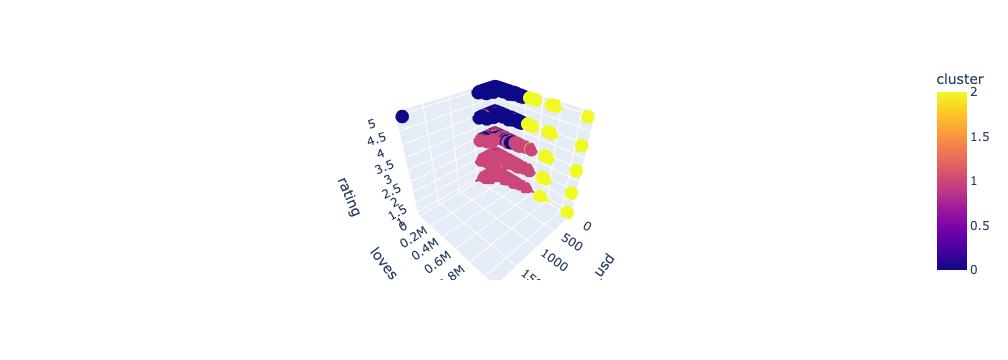

In [117]:
# Plot the clusters based on loves_count, price, and rating
# Code adapted from https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html
px.scatter_3d(df, y='loves_count',x='price_usd',z='rating',color='cluster')

3D Scatterplot Interpretation:

- Cluster 0 : Indigo
- Cluster 1 : Pink
- Cluster 2 : Yellow

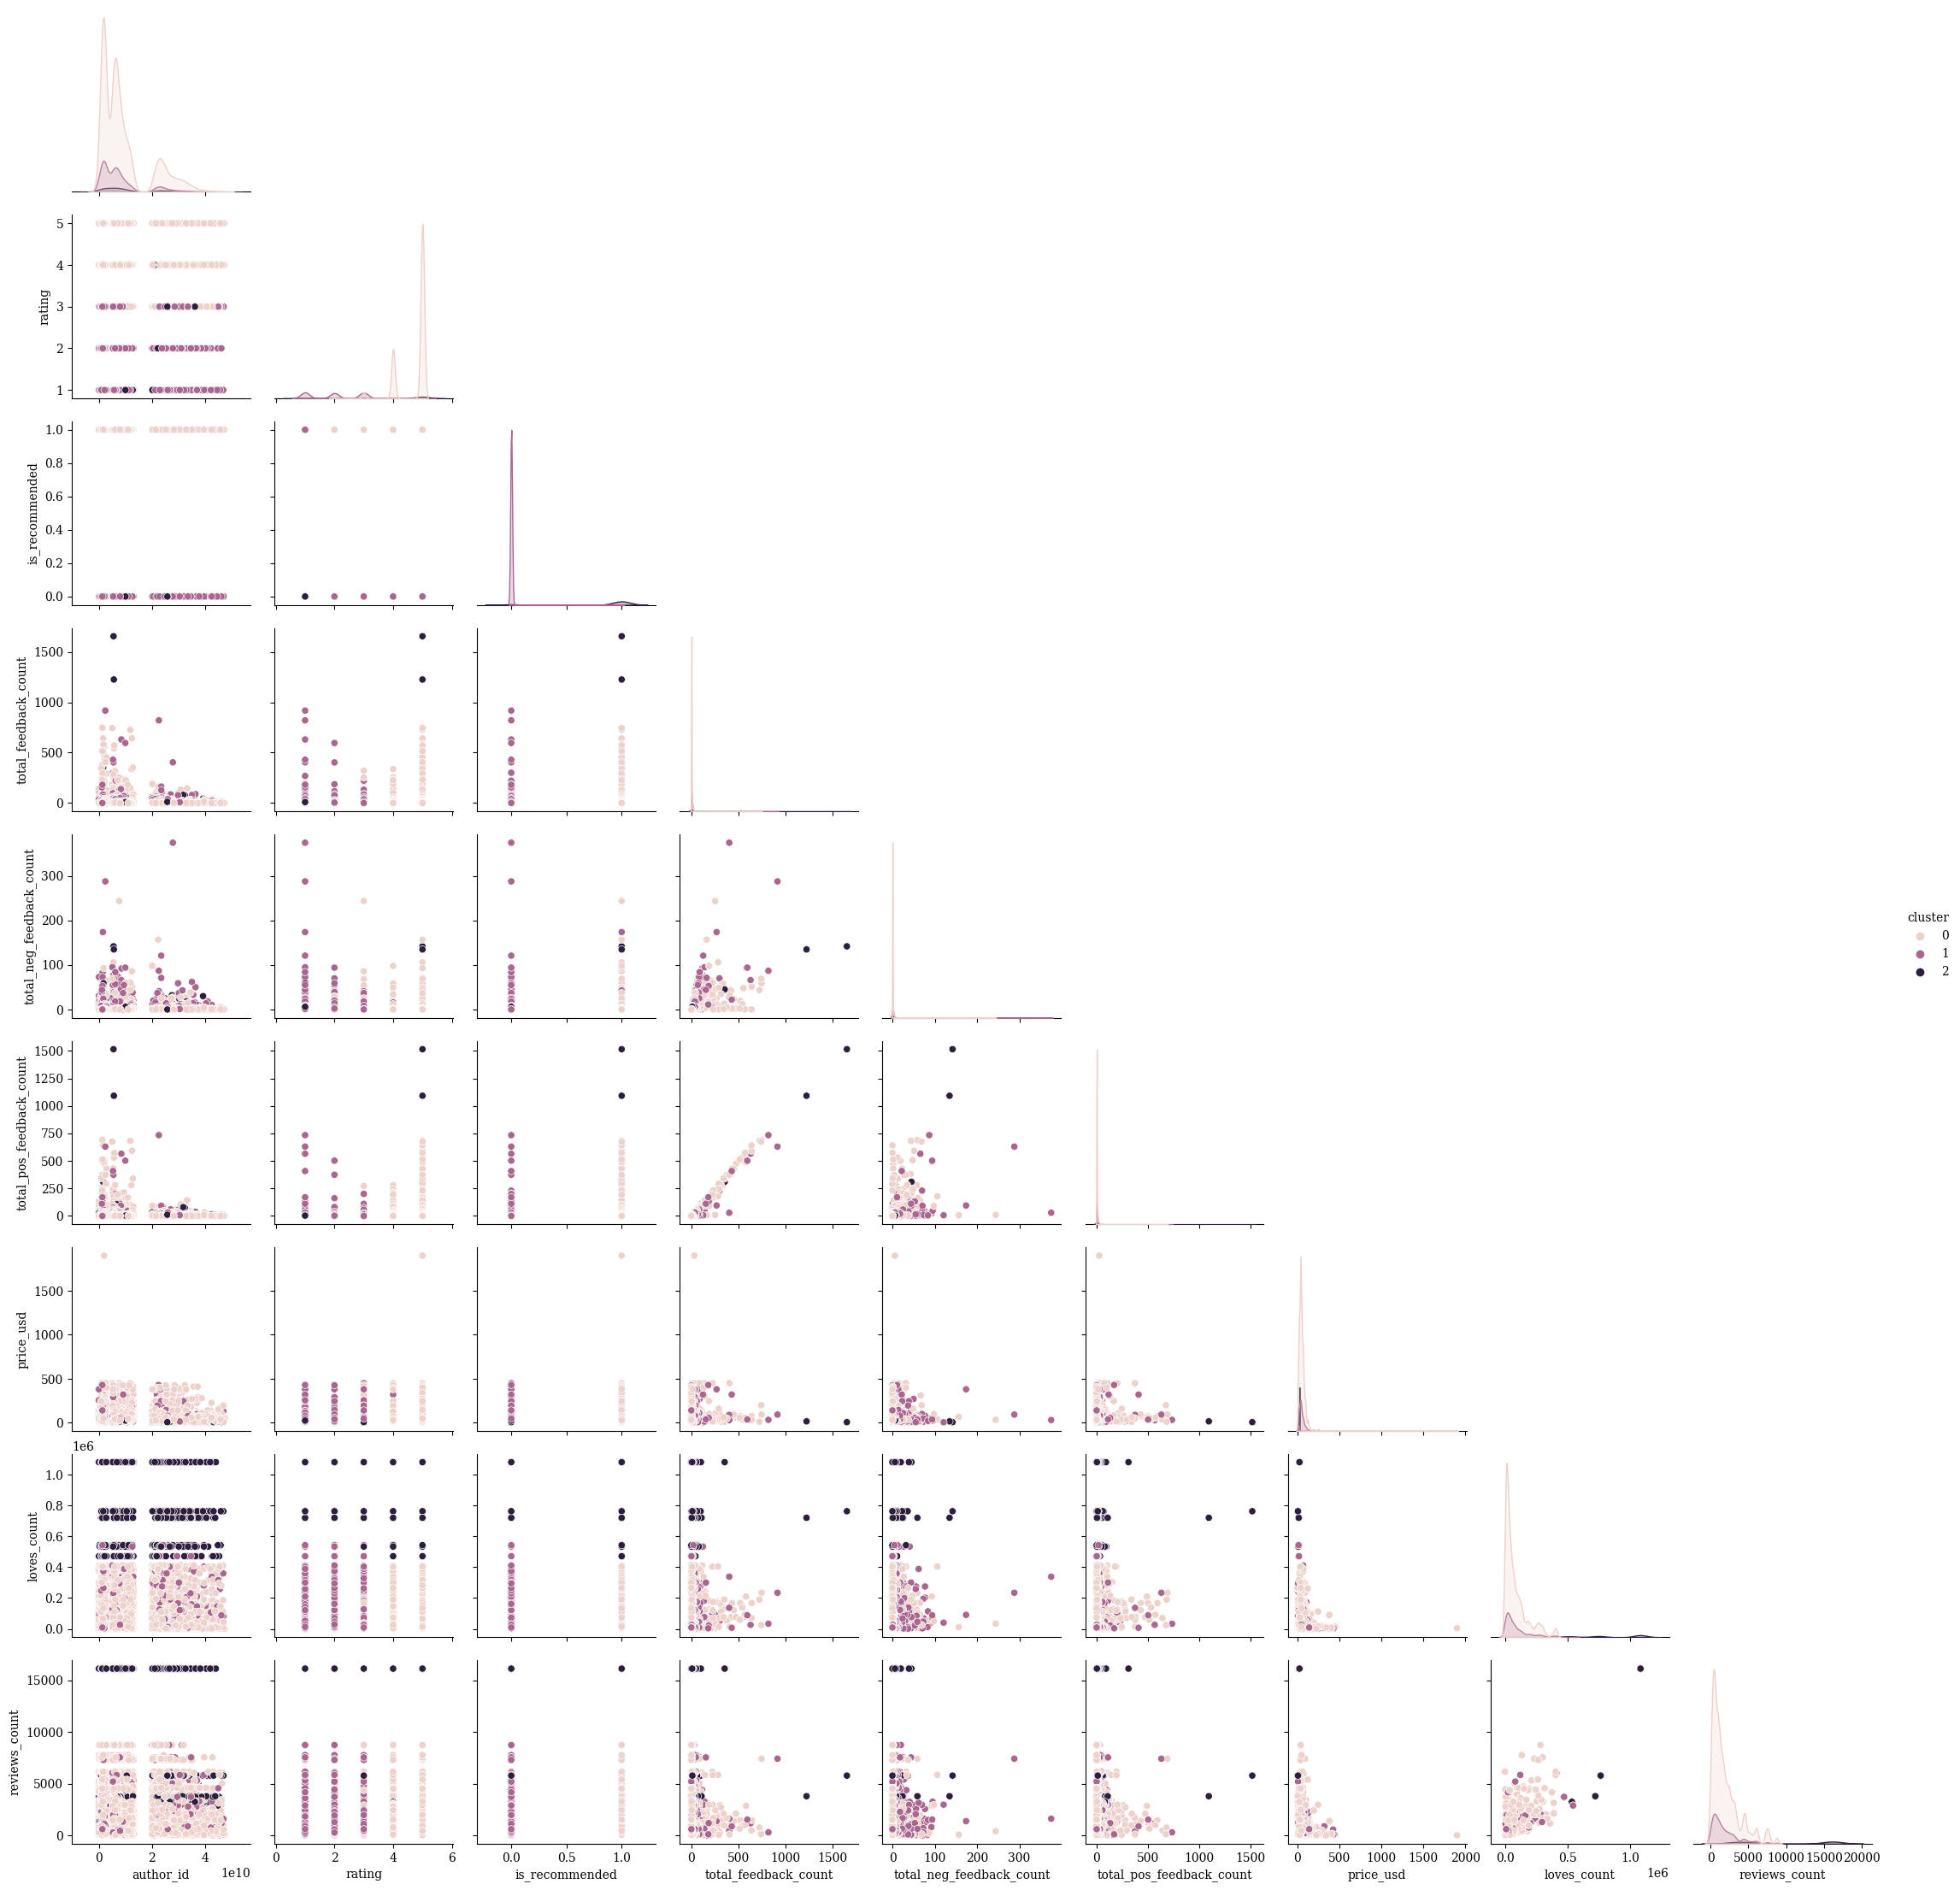

In [118]:
# Overview of clusters in each column
sns.pairplot(df,
            hue = 'cluster',
            corner = True);